# Physical Models of Living Systems
## Homework 6
### Maryam Feizi - 2091504



The Hopfield Neural Networks, invented by Dr John J. Hopfield consists of one layer of 'N' fully connected recurrent neurons. It is generally used in performing auto association and optimization tasks. It is calculated using a converging interactive process and it generates a different response than our normal neural nets.

Discrete Hopfield Network: It is a fully interconnected neural network where each unit is connected to every other unit. It behaves in a discrete manner, i.e. it gives finite distinct output, generally of two types:

- Binary (0/1)
- Bipolar (-1/1)

The weights associated with this network is symmetric in nature and has the following properties.

Structure & Architecture

- Each neuron has an inverting and a non-inverting output.
- Being fully connected, the output of each neuron is an input to all other neurons but not self.

In Hopfield network units are connected to each other via a set of weighted connections, which can either be excitatory (positive) or inhibitory (negative). When a pattern is presented to the network, the units are activated in a way that is determined by the strengths of the connections between them. The network then adjusts the strengths of these connections in order to better encode the presented pattern.

When the network is later presented with a partial or noisy version of a stored pattern, it can "recall" the original pattern by adjusting the activations of the units in a way that is consistent with the stored patterns.

This process continues until the network reaches a stable state, at which point the activations of the units should closely match those of the original stored pattern.

Hopfield networks have been used for a variety of tasks, including pattern recognition, optimization, and error correction. However, they are limited by the fact that they can only store a limited number of patterns, and that they can sometimes become trapped in states that are not stable patterns (a phenomenon known as "spurious states").




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import PIL.Image as Image 
import matplotlib.image as img

In [2]:
# read an image and convert it to a binary pattern os size [Lx, Ly]: 
# arguments = figurename, final size=[Lx, Ly]
def readPatterns(fname, size):
	this_img = Image.open(fname) # open colour image
	this_img = this_img.convert('1') # convert image to black and white
	this_img = this_img.resize(size=[size[0],size[1]]) # resize it to have the dimensions [Lx, Ly]
	this_img.save("%s_converted.png"%fname) # save converted image

	# plot the original and the converted file
	fig = plt.figure()

	# subplot on the left - original figure
	fig.add_subplot(1,2,1)		
	original = img.imread(fname)
	plt.imshow(original)
	plt.title("original")
	plt.axis('off')

	# subplot on the right - converted figure
	matrix = img.imread("%s_converted.png"%fname) # re-read from the file and convert it to a matrix of [0.,1.]
	matrix = 2*matrix-1 # convert from [0.,1.] -> [-1,1]
	fig.add_subplot(1,2,2)		
	plt.matshow(matrix, cmap=plt.cm.gray,fignum=0)
	plt.axis('off')
	plt.title("simplified")
	plt.show()
	
	# Return the pattern as a 1D vector (not as a 2D a matrix)
	return matrix.flatten()

In [3]:
class HopfieldNet:
	# initialize: 
	# arguments = number of neurons, list of patterns (vector of M components, each element of the pattern has to be an array of -1,+1 of size N)
	def __init__(self, N, patterns):
		self.N = N
		self.time_elapsed = 0.
		
		self.w = np.zeros([N,N]) # weights
		self.h = np.zeros(N) # threshold functions
		
		self.s = -np.ones(N) # default configuration = s[i]=-1
		
		# HEBBIAN RULE (h_i = 0., w_{ij} = sum_{k=1,...,M} s_i^k*s_j^k / M)
		print ("The network is learning...")
		self.M = len(patterns)
		for k in range(self.M):
			print( "pattern ", k)
			# this is not efficient, but we could use it anyway:
#			for i in range(self.N):
#				for j in range(self.N):
#					self.w[i,j] += patterns[k][i]*patterns[k][j]/(1.*self.M)

			# it is more efficient to use built-in functions:
			self.w += np.outer(patterns[k],patterns[k])/(1.*self.M)


		print ("Done!")
	
	
#		# COMPUTE THE ENERGY - As before, I avoid loops and use efficient functions
		self.E = -0.5*np.sum(self.w) - np.sum(self.h) # energy for s_i = -1
		
		return

	# given and input s=[s_1,s_2,...,s_N], set the state of the network and recompute the energy
	def set_state(self, sinput):
		self.s = np.copy(sinput)

		# COMPUTE THE ENERGY - I use efficient functions rather than loops
		s2 = np.outer(self.s, self.s) # this returns a matrix s2[i,j]=s[i]*s[j]
		self.E = -0.5*np.sum(self.w*s2) + np.sum(self.h*self.s)
	
		return

	# evolve the state of the networks doing a number "steps" of Monte Carlo steps
	def evolve(self, steps):
		for t in range(steps):
			i = np.random.randint(self.N) # choose one node randomly
		
			sum_wijsj = np.sum(self.w[i,:]*self.s) # compute the argument of the activation function			
			if sum_wijsj < self.h[i]: # below the threshold
				self.s[i] = -1
			else: # above the threshold
				self.s[i] = 1
				
		return
	

Reading images and converting to binary patterns...


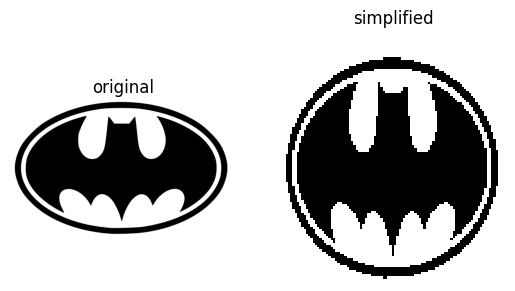

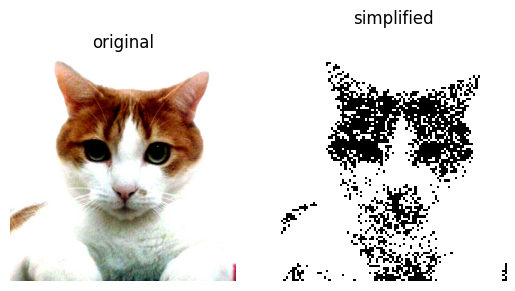

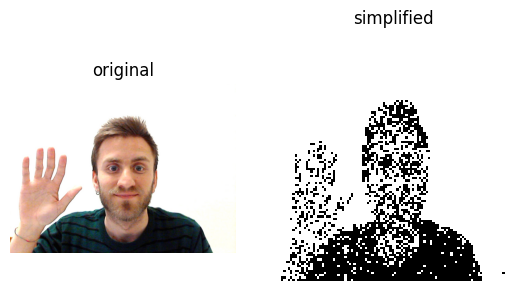

Done!


In [4]:
# dimensions of the images
Lx = Ly = 100
N = Lx*Ly # number of neurons



## STEP 1: READ THE IMAGES AND CONVERT THEM TO BINARY PATTERNS

# list of images that I want to store in my network
files = ["images/stored/batman.png", "images/stored/cat.jpg", "images/stored/jordi.jpg"]

print ("Reading images and converting to binary patterns...")
patterns = []
for fname in files:
	patterns.append(readPatterns(fname, size=[Lx,Ly]))
print ("Done!")




In [5]:
## STEP 2: CREATE THE NETWORK AND LEARN THE PREVIOUS PATTERNS
mynet = HopfieldNet(N, patterns)

The network is learning...
pattern  0
pattern  1
pattern  2
Done!


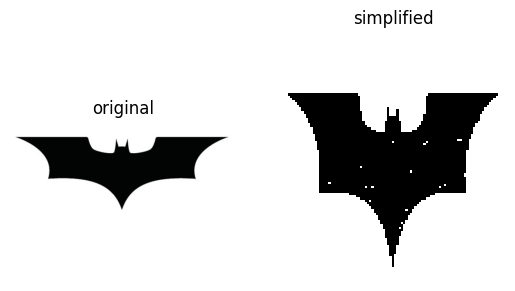

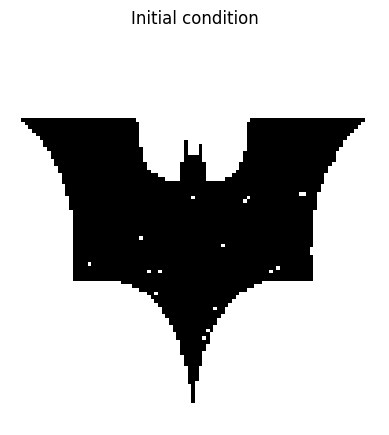

In [6]:
## STEP 3: SET ANOTHER INPUT PATTERN AS INITIAL CONDITION
newinput = readPatterns("images/inputs/batman0.png", size=[Lx,Ly]) # read the pattern from a file
mynet.set_state(newinput) # set the pattern as the initial condition of the network 
plt.matshow(np.resize(mynet.s,(Lx,Ly)), cmap=plt.cm.gray, fignum=0) # read the state (we reconvert it to a Lx*Ly matrix) and plot it
plt.title("Initial condition")
plt.axis('off')
plt.show()

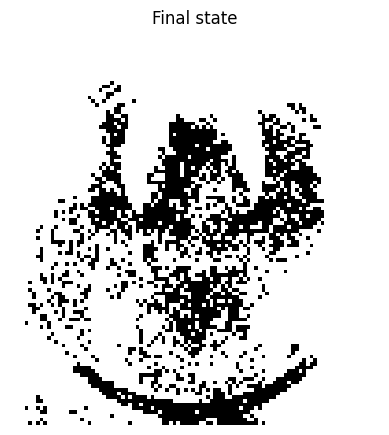

In [10]:
## STEP 4: EVOLVE THE NETWORK!
#################### ANIMATION #################################
# animation
TOTAL_FRAMES = 1000 # number of frames of the animation
DT_FRAMES = 10 # duration of each frame (ms): we can accelerate or slow down the animation changing this

fig = plt.figure()	
fig_mat = plt.matshow(np.resize(mynet.s,(Lx,Ly)), cmap=plt.cm.gray, fignum=0) # see more colormaps in https://matplotlib.org/examples/color/colormaps_reference.html
plt.axis('off')

# functions used to produce the animation
def animation_init(): # how to initialize the animation (if we put things here they will be fix in the animation) 
    fig_mat.set_data(np.resize(mynet.s,(Lx,Ly)))
    return fig_mat

def animation_update(i):
    mynet.evolve(steps=mynet.N//10)
    fig_mat.set_data(np.resize(mynet.s,(Lx,Ly)))
    return fig_mat

# generate the animation
for i in range(TOTAL_FRAMES):
    animation_update(i)
    ani = animation.FuncAnimation(fig, animation_update, frames=TOTAL_FRAMES, interval=DT_FRAMES, blit=False, repeat=False) # blit is used to make simulation faster
plt.matshow(np.resize(mynet.s,(Lx,Ly)), cmap=plt.cm.gray, fignum=0)
plt.title("Final state")
plt.axis('off')
plt.show()

The network could not find the suitable pattern, because of the image is a blurried verson. Since the overlap is significantly different from zero even if one image is blurried, also the input image is already very similar to the batman logo stored as a pattern and it evolves quickly to the desired pattern.

In [11]:
# functions used to produce the animation
def animation_init(): # how to initialize the animation (if we put things here they will be fix in the animation) 
	fig_mat.set_data(np.resize(mynet.s,(Lx,Ly)))
	return fig_mat

def animation_update(i):
	mynet.evolve(steps=N/10)
	fig_mat.set_data(np.resize(mynet.s,(Lx,Ly)))
	return fig_mat

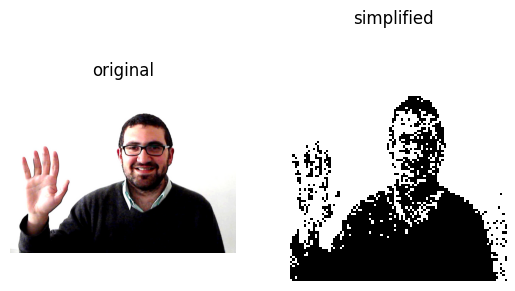

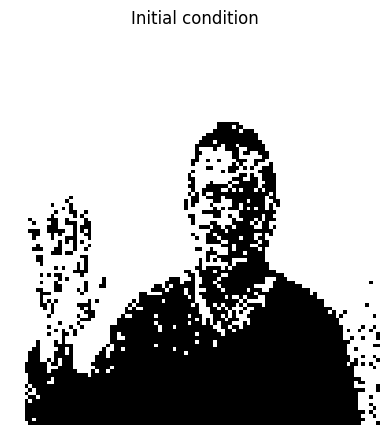

In [12]:
## SET ANOTHER INPUT PATTERN AS INITIAL CONDITION
newinput = readPatterns("images/inputs/samir.jpg", size=[Lx,Ly]) # read the pattern from a file
mynet.set_state(newinput) # set the pattern as the initial condition of the network 
plt.matshow(np.resize(mynet.s,(Lx,Ly)), cmap=plt.cm.gray, fignum=0) # read the state (we reconvert it to a Lx*Ly matrix) and plot it
plt.title("Initial condition")
plt.axis('off')
plt.show()


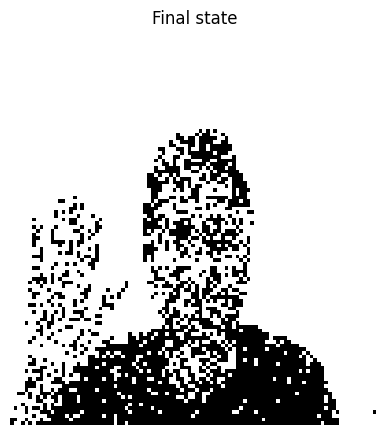

In [13]:
## EVOLVE THE NETWORK!
#################### ANIMATION #################################
# animation
TOTAL_FRAMES = 1000 # number of frames of the animation
DT_FRAMES = 10 # duration of each frame (ms): we can accelerate or slow down the animation changing this

fig = plt.figure()	
fig_mat = plt.matshow(np.resize(mynet.s,(Lx,Ly)), cmap=plt.cm.gray, fignum=0) # see more colormaps in https://matplotlib.org/examples/color/colormaps_reference.html
plt.axis('off')

# functions used to produce the animation
def animation_init(): # how to initialize the animation (if we put things here they will be fix in the animation) 
    fig_mat.set_data(np.resize(mynet.s,(Lx,Ly)))
    return fig_mat

def animation_update(i):
    mynet.evolve(steps=mynet.N//10)
    fig_mat.set_data(np.resize(mynet.s,(Lx,Ly)))
    return fig_mat

# generate the animation
for i in range(TOTAL_FRAMES):
    animation_update(i)
    ani = animation.FuncAnimation(fig, animation_update, frames=TOTAL_FRAMES, interval=DT_FRAMES, blit=False, repeat=False) # blit is used to make simulation faster
plt.matshow(np.resize(mynet.s,(Lx,Ly)), cmap=plt.cm.gray, fignum=0)
plt.title("Final state")
plt.axis('off')
plt.show()



With "samir.jpg" images as an input oth the network, we can see the network recalls most similar pattern, which is "jordi.jpg" image(with the same hand position). We can expect that the network has successfully learn the patterns with human shape of raising hand.

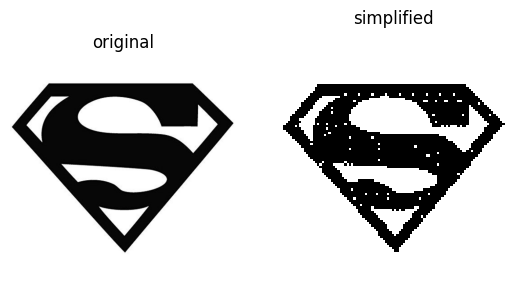

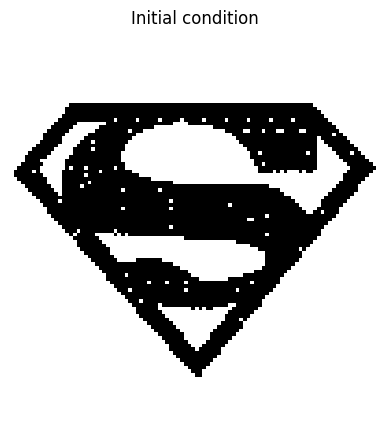

In [13]:
#use superman.jpg as an input

## SET ANOTHER INPUT PATTERN AS INITIAL CONDITION
newinput = readPatterns("images/inputs/superman.jpg", size=[Lx,Ly]) # read the pattern from a file
mynet.set_state(newinput) # set the pattern as the initial condition of the network 
plt.matshow(np.resize(mynet.s,(Lx,Ly)), cmap=plt.cm.gray, fignum=0) # read the state (we reconvert it to a Lx*Ly matrix) and plot it
plt.title("Initial condition")
plt.axis('off')
plt.show()



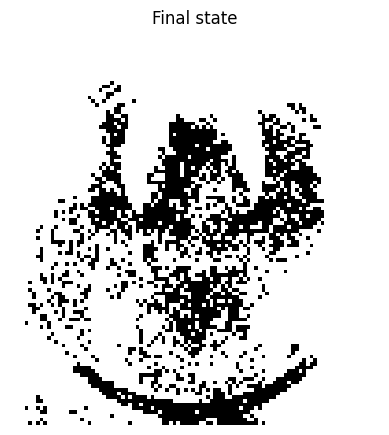

In [17]:


## EVOLVE THE NETWORK!
#################### ANIMATION #################################
# animation
TOTAL_FRAMES = 1000 # number of frames of the animation
DT_FRAMES = 10 # duration of each frame (ms): we can accelerate or slow down the animation changing this

fig = plt.figure()	
fig_mat = plt.matshow(np.resize(mynet.s,(Lx,Ly)), cmap=plt.cm.gray, fignum=0) # see more colormaps in https://matplotlib.org/examples/color/colormaps_reference.html
plt.axis('off')

# functions used to produce the animation
def animation_init(): # how to initialize the animation (if we put things here they will be fix in the animation) 
    fig_mat.set_data(np.resize(mynet.s,(Lx,Ly)))
    return fig_mat

def animation_update(i):
    mynet.evolve(steps=mynet.N//10)
    fig_mat.set_data(np.resize(mynet.s,(Lx,Ly)))
    return fig_mat

# generate the animation
for i in range(TOTAL_FRAMES):
    animation_update(i)
    ani = animation.FuncAnimation(fig, animation_update, frames=TOTAL_FRAMES, interval=DT_FRAMES, blit=False, repeat=False) # blit is used to make simulation faster
plt.matshow(np.resize(mynet.s,(Lx,Ly)), cmap=plt.cm.gray, fignum=0)
plt.title("Final state")
plt.axis('off')
plt.show()



We can see as superman image as an input that the network recalls the most similar pattern that is had stored previously. But the pattern is not obvious for me is it the cat or batman.

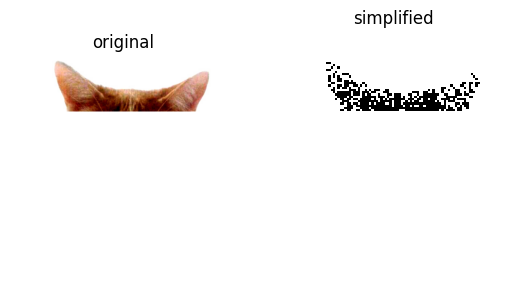

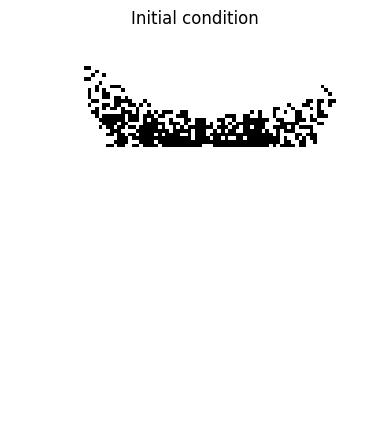

In [18]:


## SET ANOTHER INPUT PATTERN AS INITIAL CONDITION
newinput = readPatterns("images/inputs/cat3.jpg", size=[Lx,Ly]) # read the pattern from a file
mynet.set_state(newinput) # set the pattern as the initial condition of the network 
plt.matshow(np.resize(mynet.s,(Lx,Ly)), cmap=plt.cm.gray, fignum=0) # read the state (we reconvert it to a Lx*Ly matrix) and plot it
plt.title("Initial condition")
plt.axis('off')
plt.show()



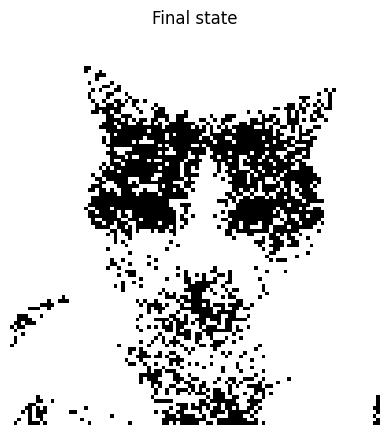

In [19]:
## EVOLVE THE NETWORK!
#################### ANIMATION #################################
# animation
TOTAL_FRAMES = 1000 # number of frames of the animation
DT_FRAMES = 10 # duration of each frame (ms): we can accelerate or slow down the animation changing this

fig = plt.figure()	
fig_mat = plt.matshow(np.resize(mynet.s,(Lx,Ly)), cmap=plt.cm.gray, fignum=0) # see more colormaps in https://matplotlib.org/examples/color/colormaps_reference.html
plt.axis('off')

# functions used to produce the animation
def animation_init(): # how to initialize the animation (if we put things here they will be fix in the animation) 
    fig_mat.set_data(np.resize(mynet.s,(Lx,Ly)))
    return fig_mat

def animation_update(i):
    mynet.evolve(steps=mynet.N//10)
    fig_mat.set_data(np.resize(mynet.s,(Lx,Ly)))
    return fig_mat

# generate the animation
for i in range(TOTAL_FRAMES):
    animation_update(i)
    ani = animation.FuncAnimation(fig, animation_update, frames=TOTAL_FRAMES, interval=DT_FRAMES, blit=False, repeat=True) # blit is used to make simulation faster
plt.matshow(np.resize(mynet.s,(Lx,Ly)), cmap=plt.cm.gray, fignum=0)
plt.title("Final state")
plt.axis('off')
plt.show()

The network has found the correct pattern, in this case the cat image. We can see that the update changes the portion of the original image is denied and the evolved image starts to match the stored patterns. If we use the image "cat2.jpg" (another piece of the original cat image) the same result will be given.

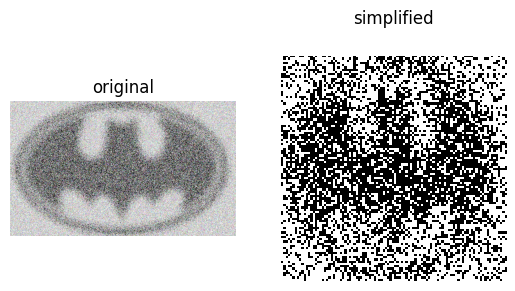

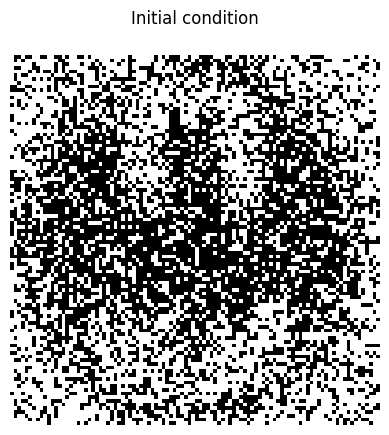

In [20]:
## SET ANOTHER INPUT PATTERN AS INITIAL CONDITION
newinput = readPatterns("images/inputs/batman2.png", size=[Lx,Ly]) # read the pattern from a file
mynet.set_state(newinput) # set the pattern as the initial condition of the network 
plt.matshow(np.resize(mynet.s,(Lx,Ly)), cmap=plt.cm.gray, fignum=0) # read the state (we reconvert it to a Lx*Ly matrix) and plot it
plt.title("Initial condition")
plt.axis('off')
plt.show()


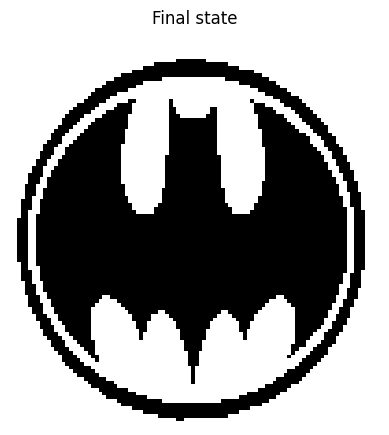

In [21]:
## EVOLVE THE NETWORK!
#################### ANIMATION #################################
# animation
TOTAL_FRAMES = 1000 # number of frames of the animation
DT_FRAMES = 10 # duration of each frame (ms): we can accelerate or slow down the animation changing this

fig = plt.figure()	
fig_mat = plt.matshow(np.resize(mynet.s,(Lx,Ly)), cmap=plt.cm.gray, fignum=0) # see more colormaps in https://matplotlib.org/examples/color/colormaps_reference.html
plt.axis('off')

# functions used to produce the animation
def animation_init(): # how to initialize the animation (if we put things here they will be fix in the animation) 
    fig_mat.set_data(np.resize(mynet.s,(Lx,Ly)))
    return fig_mat

def animation_update(i):
    mynet.evolve(steps=mynet.N//10)
    fig_mat.set_data(np.resize(mynet.s,(Lx,Ly)))
    return fig_mat

# generate the animation
for i in range(TOTAL_FRAMES):
    animation_update(i)
    ani = animation.FuncAnimation(fig, animation_update, frames=TOTAL_FRAMES, interval=DT_FRAMES, blit=False, repeat=True) # blit is used to make simulation faster
plt.matshow(np.resize(mynet.s,(Lx,Ly)), cmap=plt.cm.gray, fignum=0)
plt.title("Final state")
plt.axis('off')
plt.show()

This time I used "batman2" image and the network find the correct pattern in this case. As a result, the network learn the patterns very well.